# KNN

## <b><u>Documentation Links</u></b>

- <b>KNN Classifier</b>: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- <b>KNN Regresor</b>: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
- <b>Distance Metrics</b>: https://docs.scipy.org/doc/scipy/reference/spatial.distance.html
- <b>KD Tree</b>: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree
- <b>Ball Tree</b>: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree
- <b>LSH Forest</b>: https://scikit-learn.org/0.16/modules/generated/sklearn.neighbors.LSHForest.html

**Type** - Supervise Learning Algorithm  
**Task** - Classification and Regression  

Remember that, KNN is a:
1. **Non-Parametric Algorithm**, meaning it doesn't make assumptions about the underlying data distribution.
2. **Lazy Learning Algorithm**, meaning it doesn't learn a model during the training phase. Instead, it makes predictions based on the majority class or average value of its k-nearest neighbors.

### **Algorithm Workflow**
1. **Training Phase** -
    - KNN doesn't have a training phase as it memorizes the entire training dataset.
    - Choose **k** (i.e. Number of Nearest Neighbours).
    - Choose a **distance metric**.
    - ```python
      # Code implementation
      from sklearn.neighbors import KNeighborsClassifier
      classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski',  p=2)
      ```
2. **Prediction Phase** -
    - **Similarity Calculation** - For each new query data point, the algorithm calculates the distance to all other points in the training set.
    - Select the **k** nearest neighbors based on the calculated distances.
    - **Majority Vote (Classification) or Average (Regression)** - In classification, the algorithm assigns the class label that is most common among its k neighbors. In regression, it predicts the average target value of its k neighbors.
    - ```python
      # Code Implementation
      classifier.predict(X_test_transformed)
      ```


### **Use Cases** -
KNN is used in various applications, including handwriting recognition, image classification, recommendation systems, and medical diagnosis.

### **Important Note** -
The performance of the k-Nearest Neighbors (KNN) algorithm can be affected by the presence of outliers and missing data. Let's discuss how outliers and missing data can impact KNN.
1. Outliers can significantly impact distance calculations, especially if the distance metric is sensitive to extreme values. For example, the Euclidean distance is sensitive to outliers.
2. Missing data can affect the calculation of distances between data points. If features have missing values, it can lead to biased distance computations.  
**Mitigating this Issue** - The performance of KNN can be sensitive to outliers and missing data, but with proper data preprocessing, appropriate handling of missing values, and careful selection of distance metrics, it is possible to improve the robustness of the algorithm in the presence of such challenges.

In [ ]:
# Working with fashion MNIST on KNN

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the dataset
df = pd.read_csv(r"data\fashion-mnist_train.csv")
df.head()

In [ ]:
df.shape

In [ ]:
sns.countplot(data = df, x= df["label"],hue=df["label"])

#### EDA TO BE DONE BY STUDENTS

## **About the dataset**

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

| Label | Fashion Product |
| :---: | :---: |
| 0 | T-shirt/top |
| 1 | Trouser |  
| 2 | Pullover |  
| 3 | Dress |  
| 4 | Coat |  
| 5 | Sandal |  
| 6 | Shirt |  
| 7 | Sneaker |  
| 8 | Bag |  
| 9 | Ankle boot |  

## Segregating Input and Output

In [ ]:
y = df["label"]

X = df.drop("label",axis = 1)

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
print(X.shape,y.shape,sep="\n")

In [ ]:
# mapping categories based on problem statement
item_dictionary = {0: 't-shirt/top', 1: 'trouser',
                   2: 'pullover', 3: 'dress',
                   4: 'coat', 5: 'sandal',
                   6: 'shirt', 7: 'sneaker',
                   8: 'bag', 9: 'ankle_boot'}
Y = y.map(item_dictionary)
Y.head()

In [ ]:
plt.figure(figsize=(12, 5))

for i in item_dictionary:
    plt.subplot(2, 5, i+1)
    idx = np.random.choice(np.where(Y == item_dictionary[i])[0])
    plt.title(f"{Y[idx]}")
    img_grid = np.reshape(X.values[idx], (28,28))
    plt.imshow(img_grid)

### Model Training KNN

In [ ]:
# Performing Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.25,
                                                    random_state = 0)

In [ ]:
# Default KNN
from sklearn.neighbors import KNeighborsClassifier

classifier1 = KNeighborsClassifier()

classifier1.fit(X_train, y_train)

In [ ]:
# KNN with different parameters
classifier2 = KNeighborsClassifier(n_neighbors=int(np.sqrt(X_train.shape[0])),
                                  weights="distance",
                                  algorithm="kd_tree",
                                  p=10,
                                  metric="minkowski")

classifier2.fit(X_train, y_train)

In [ ]:
# KNN with different parameters
classifier3 = KNeighborsClassifier(n_neighbors=int(np.sqrt(X_train.shape[0])),
                                  weights="distance",
                                  algorithm="ball_tree",
                                  p=10,
                                  metric="minkowski")

classifier3.fit(X_train, y_train)

LSHForest has been dropped from the recent versions of sklearn, however if you wish to explore Approximate Nearest Neighbors, you can look into ANNOY.
Link: https://github.com/spotify/annoy

In [ ]:
# Classes known to classifier
classifier1.classes_

In [ ]:
# Knowing the distance metric used
classifier2.effective_metric_

In [ ]:
# Number of features seen by algo during training
classifier3.n_features_in_

In [ ]:
# Names of features seen during training

classifier1.feature_names_in_

### Model Testing : KNN

In [ ]:
%%time

# Prediction on unseen datapoints (Takes 8 hours to run)
y_test_pred1 = classifier1.predict(X_test)
y_test_pred2 = classifier2.predict(X_test)
y_test_pred3 = classifier3.predict(X_test)

In [ ]:
# Calculate accuracy of class predictions
from sklearn import metrics

print("KNN Version 1:",metrics.accuracy_score(y_test, y_test_pred1))
print("KNN Version 2:",metrics.accuracy_score(y_test, y_test_pred2))
print("KNN Version 3:",metrics.accuracy_score(y_test, y_test_pred3))

In [ ]:
# Visualizing Normalized Heat Map
cm1 = metrics.confusion_matrix(y_test, y_test_pred1, labels=classifier1.classes_)
cm2 = metrics.confusion_matrix(y_test, y_test_pred2, labels=classifier2.classes_)
cm3 = metrics.confusion_matrix(y_test, y_test_pred3, labels=classifier3.classes_)

In [ ]:
fig1 = metrics.ConfusionMatrixDisplay(cm1, display_labels=classifier1.classes_)
fig2 = metrics.ConfusionMatrixDisplay(cm2, display_labels=classifier2.classes_)
fig3 = metrics.ConfusionMatrixDisplay(cm3, display_labels=classifier3.classes_)

In [ ]:
fig1.plot()

In [ ]:
fig2.plot()

In [ ]:
fig3.plot()

In [ ]:
# Normalizing the matrix
actual1 = np.sum(cm1, axis=1).reshape(-1, 1)
cmn1 = np.round(cm1/actual1, 2)

actual2 = np.sum(cm2, axis=1).reshape(-1, 1)
cmn2 = np.round(cm2/actual2, 2)

actual3 = np.sum(cm3, axis=1).reshape(-1, 1)
cmn3 = np.round(cm3/actual3, 2)

In [ ]:
sns.heatmap(cmn1, annot=True, fmt='.2f', xticklabels=classifier1.classes_, yticklabels=classifier1.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
sns.heatmap(cmn2, annot=True, fmt='.2f', xticklabels=classifier2.classes_, yticklabels=classifier2.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
sns.heatmap(cmn3, annot=True, fmt='.2f', xticklabels=classifier3.classes_, yticklabels=classifier3.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Naive Bayes

**Type** - Supervise Learning Algorithm  
**Task** - Classification

### Everything You Need to Know about Naive Bayes Algorithm
1. **Bayes' Theorem:**
   - Naive Bayes is based on Bayes' theorem, which is a mathematical formula that helps us update the probability of a hypothesis based on new evidence.
2. **Assumption of Independence:**
   - The "naive" part comes from assuming that the features (characteristics) used for prediction are independent, even if they might not be in reality.
3. **Types of Naive Bayes:**
   - There are different types of Naive Bayes classifiers, including **Gaussian Naive Bayes (for continuous data)**, **Multinomial Naive Bayes (for discrete data, often used for text classification)**, and **Bernoulli Naive Bayes (for binary data)**.
4. **Classification:**
   - Naive Bayes is commonly used for classification tasks, where the goal is to predict the category or class of a new instance based on its features.
5. **NLP Usecases:**
   - It's widely used in natural language processing for tasks like spam email detection or sentiment analysis.

### Types of Naive Bayes classifiers
There isn’t just one type of Naïve Bayes classifier. The most popular types differ based on the distributions of the feature values. Some of these include: 
1. **Gaussian Naïve Bayes (GaussianNB):** This is a variant of the Naïve Bayes classifier, which is used with Gaussian distributions—i.e. normal distributions—and continuous variables. This model is fitted by finding the mean and standard deviation of each class. 
2. **Multinomial Naïve Bayes (MultinomialNB):** This type of Naïve Bayes classifier assumes that the features are from multinomial distributions. This variant is useful when using discrete data, such as frequency counts, and it is typically applied within natural language processing use cases, like spam classification. 
3. **Bernoulli Naïve Bayes (BernoulliNB):** This is another variant of the Naïve Bayes classifier, which is used with Boolean variables—that is, variables with two values, such as True and False or 1 and 0. 


### Naive Bayes Performance in the Presence of Outliers and Missing Data
1. **Outliers:**
   - Naive Bayes is generally robust to outliers because it focuses on probability estimation. Outliers may not heavily influence probability calculations.
2. **Missing Data:**
   - Naive Bayes can handle missing data to some extent, as it calculates probabilities independently for each feature. However, missing data might affect the estimation of probabilities.

### Pros and Cons
**Pros:**
1. **Less complex:** Compared to other classifiers, Naïve Bayes is considered a simpler classifier since the parameters are easier to estimate. As a result, it’s one of the first algorithms learned within data science and machine learning courses.
2. **Scales well:** Compared to logistic regression, Naïve Bayes is considered a fast and efficient classifier that is fairly accurate when the conditional independence assumption holds. It also has low storage requirements. 
3. **Can handle high-dimensional data:** Use cases, such document classification, can have a high number of dimensions, which can be difficult for other classifiers to manage. 


**Cons:**
1. **Subject to Zero frequency:** Zero frequency occurs when a categorical variable does not exist within the training set. For example, imagine that we’re trying to find the maximum likelihood estimator for the word, “sir” given class “spam”, but the word, “sir” doesn’t exist in the training data. The probability in this case would zero, and since this classifier multiplies all the conditional probabilities together, this also means that posterior probability will be zero. To avoid this issue, laplace smoothing can be leveraged.
2. **Unrealistic core assumption:** While the conditional independence assumption overall performs well, the assumption does not always hold, leading to incorrect classifications. 

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [ ]:
df = pd.DataFrame(columns=['news_article', 'label'])

def find_txt_files(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(".txt"):  # Consider case-insensitive matching
                file_path = os.path.abspath(os.path.join(root, file))
                dirname = file_path.split(os.path.sep)[-2]
                with open(file_path, 'r',) as f:
                    text = f.read()
                    text = text.replace('\n', ' ')
                    df.loc[len(df)] = [text, dirname]

directory_path = r"data\bbc"

find_txt_files(directory_path)

print(df.shape)

df.head()

In [ ]:
df["label"].value_counts()

In [ ]:
sns.countplot(df, x='label')

## **About the Data**

Data consists of 2225 documents from the BBC news website corresponding to stories in five topical areas from 2004-2005.
Natural Classes: 5 (business, entertainment, politics, sport, tech)

**Credits**
```
If you make use of the dataset, please consider citing the publication: 
- D. Greene and P. Cunningham. "Practical Solutions to the Problem of Diagonal Dominance in Kernel Document Clustering", Proc. ICML 2006.

All rights, including copyright, in the content of the original articles are owned by the BBC.

Contact Derek Greene <derek.greene@ucd.ie> for further information.
http://mlg.ucd.ie/datasets/bbc.html
```

In [ ]:
# Segregating Input and Output
y = df['label']
X = df[['news_article']]

In [ ]:
# Splitting into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

In [ ]:
X_train.shape

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

text = " ".join(X_train.loc[y_train=='sport', 'news_article'])

word_cloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(text)

plt.figure(1,figsize=(30,20))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [ ]:
# Pre-processing text
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
# initialise the inbuilt Stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [ ]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words                
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [ ]:
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()

In [ ]:
# Now you can use `progress_apply` instead of `apply` and `progress_map` instead of `map`
temp_df = X_train['news_article'].progress_apply(lambda x: preprocess(x, 'lemma'))
temp_df.head()

In [ ]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']
X_train = pd.concat([X_train, temp_df], axis=1)
X_train.head()

In [ ]:
# Using BoW Transformation
from sklearn.feature_extraction.text import CountVectorizer
vocab = CountVectorizer()
X_train_bow = vocab.fit_transform(X_train['clean_text_lemma'])

In [ ]:
X_train_bow

In [ ]:
print("Total unique words:", len(vocab.vocabulary_))
print("Type of train features:", type(X_train_bow))
print("Shape of input data:", X_train_bow.shape)

In [ ]:
# Pre-processing test data
temp_df = X_test['news_article'].progress_apply(lambda x: preprocess(x, 'lemma'))
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']
X_test = pd.concat([X_test, temp_df], axis=1)
X_test.head()

In [ ]:
X_test_bow = vocab.transform(X_test['clean_text_lemma'])

In [ ]:
%%time

# Implementing Multinomial Naive Bayes for text

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
classifier = MultinomialNB()
classifier.fit(X_train_bow, y_train)
y_test_pred = classifier.predict(X_test_bow)
print(metrics.accuracy_score(y_test, y_test_pred))

In [ ]:
print(metrics.classification_report(y_test, y_test_pred))

In [ ]:
cm = metrics.confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)
fig = metrics.ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
fig.plot()

In [ ]:
# Normalzing the confusion metric
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Decision Trees

<img style="float: right;" width="400" height="400" src = "imgs/DT0.png">
Decision Trees are a popular and versatile machine learning algorithm used for both classification and regression tasks. A Decision Tree is a tree-like model where each internal node represents a decision based on the value of a particular feature, and each leaf node represents the outcome of a decision or a target variable.

### **Algorithms**
> 1. ID3
> 2. C4.5
> 3. C5.0
> 4. CART (implemented in sklearn for decision trees)

### **Working of CART Algorithm**  
> 1. The algorithm selects the best feature to split the dataset based on a certain criterion (e.g., Gini impurity for classification, mean squared error for regression).
> 2. It recursively divides the dataset into subsets based on the chosen feature.
> 3. The process continues until a stopping condition is met (e.g., a predefined depth is reached, or a node contains a minimum number of data points).
> 4. Each leaf node corresponds to a class label in classification or a predicted value in regression.

### **Key Concept**  
<img style="float: right;" width="500" height="400" src = "imgs/DT1.PNG">

1. **Information Gain**  
In the context of decision tree algorithms, the **Information Gain** is a metric **used to determine the effectiveness of a feature in partitioning the data**. The Information Gain is calculated by measuring the reduction in entropy (or Gini impurity) after a dataset is split based on a particular feature. The formula for Information Gain is often expressed as the weighted sum of entropies of child nodes.

> The weighted entropy is beneficial in situations where the classes in the child nodes are not balanced, meaning one child node might have more instances than the other. This is particularly important in datasets where the class distribution is skewed.  
> The formula for Information Gain with weighted entropy is as follows:

$$\text{Information Gain} = \text{Entropy(parent)} - \sum_{i=1}^{p} \frac{|D_i|}{|D|} \cdot \text{Entropy(child}_i) $$

<img style="float: right;" width="500" height="400" src = "imgs/DT3.PNG">

> Here:
> - $p$ is the number of child nodes.
> - $|D_i|$ is the number of instances in the \(i\)-th child node.
> - $|D|$ is the total number of instances in the parent node.

2. **Entropy (Classification Trees)** `AKA Shannon Entropy`  
Entropy is a measure used for splitting nodes in Decision Trees, particularly in information theory. It is commonly applied in classification tasks. Entropy is a measure of node impurity. The lower the entropy, the more homogeneous the node is in terms of class labels.
The formula for entropy $H(t)$ for a given node is defined as:

$$ H(t) = - \sum_{i=1}^{C} p(y_i) \log_2(p(y_i)) $$

> Here:
> - $t$ is the current node.
> - $C$ is the number of classes.
> - $p(y_i)$ is the probability of class in the $t$ node.
> The entropy ranges from 0 to 1

<img style="float: right;" width="500" height="400" src = "imgs/DT2.PNG">

3. **Gini Impurity (Classification Trees)**
For a given node $t$, the Gini impurity $G(t)$ is calculated as:

$$ G(t) = 1 - \sum_{i=1}^{C} p(y_i)^2 $$

> where $C$ is the number of classes and $p(y_i)$ is the probability of class in the $t$ node. The lower the Gini impurity, the more homogeneous the node is in terms of class labels.

4. **Mean Squared Error (Regression Trees)**  
For regression tasks, the mean squared error (MSE) is commonly used as the criterion for splitting nodes. Given a node $t$ with $|D_i|$ data points and their target values $y_i$, the MSE $MSE(t)$ is calculated as:

$$ MSE(t) = \frac{1}{|D_i|} \sum_{i \in t} (y_i - \bar{y}_t)^2 $$

> where $\bar{y}_t$ is the mean target value in node $t$. The idea is to minimize the variance of the target values within each node.

> Similar to classification trees, when constructing a regression tree, the algorithm evaluates the MSE for each feature and its potential split points and selects the feature and split point that result in the lowest overall MSE across the child nodes.


### **Advantages**  
> 1. Requires very little data preparation - No need to rescale numerical columns. For categorical columns apply LabelEncoding
> 2. Very fast during prediction time
> 3. Interpretability
> 4. Feature Importance
> 5. Non Linearity
> 6. Handle Missing Values
> 7. Handle Multi-class Classification Problem

### **Disadvantages**  
> 1. Overfitting
> 2. Instable
> 3. Sensitive to Outliers
> 4. Sensitive to Data Imbalance - Biased towards class that dominates
> 5. Very high training time. It is worse if there are numerical features in input data.
> 6. Predictions are piecewise constant approximation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv('data/iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Segregating Input and Output
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

In [4]:
# Performing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
classifier = DecisionTreeClassifier(max_depth = 3)
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_pred))

0.9736842105263158


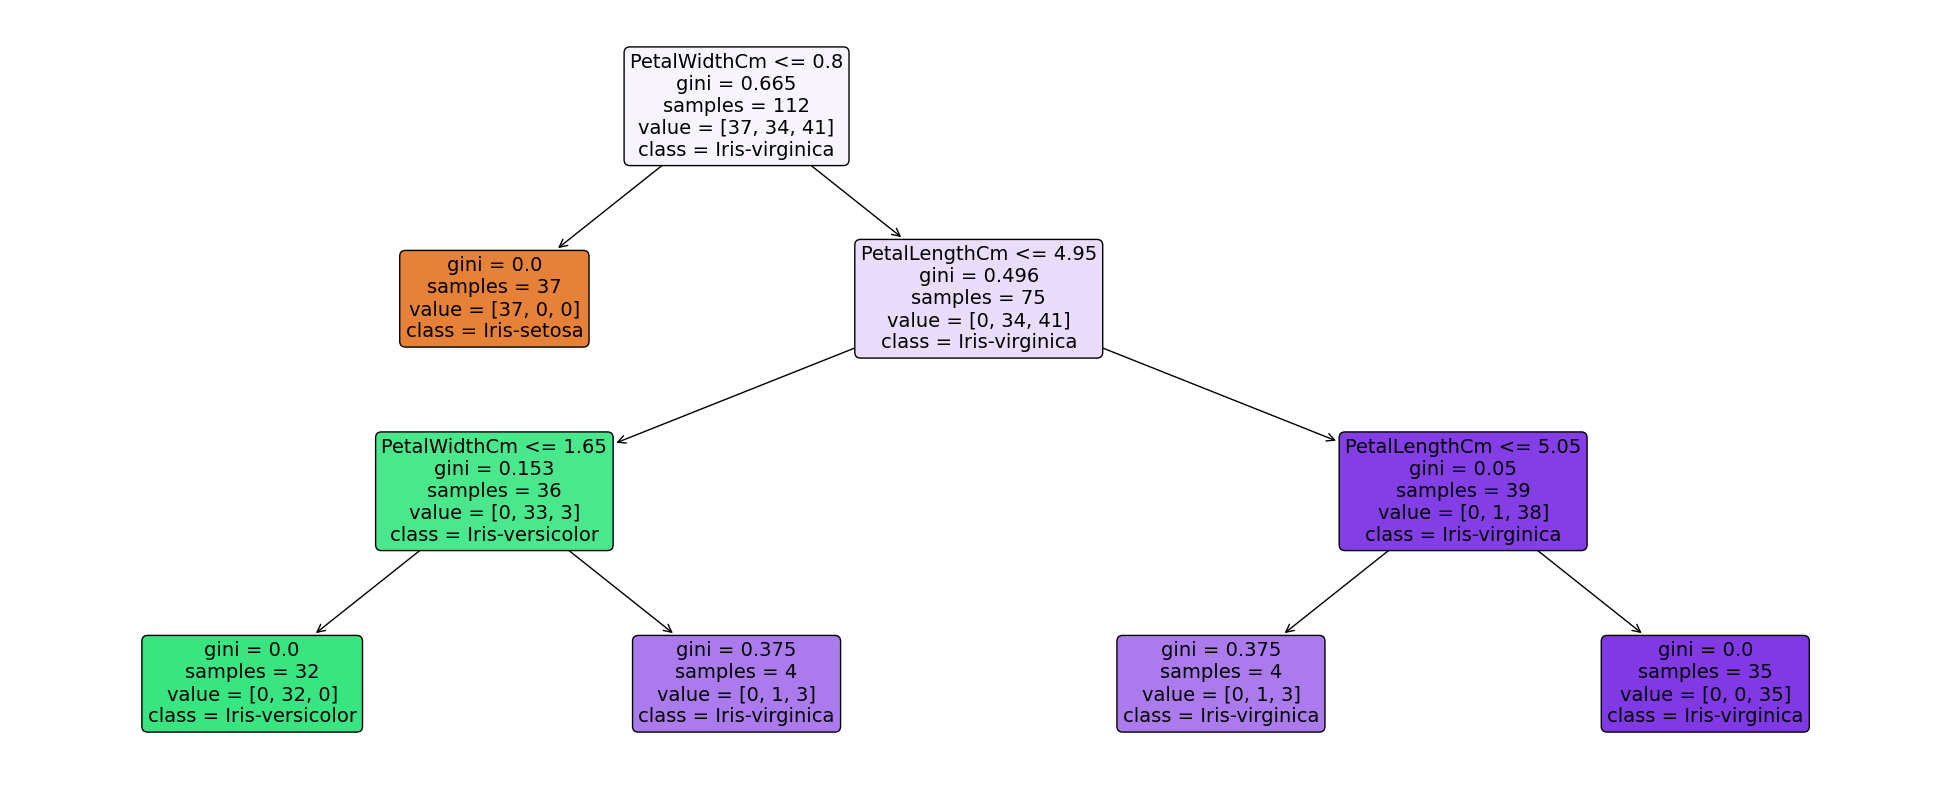

In [6]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,10))

f = plot_tree(classifier, 
              feature_names = X_train.columns, 
              class_names = classifier.classes_, 
              filled = True, 
              rounded = True, 
              fontsize = 14
             )

plt.show()

### Feature Importance with Decision Trees

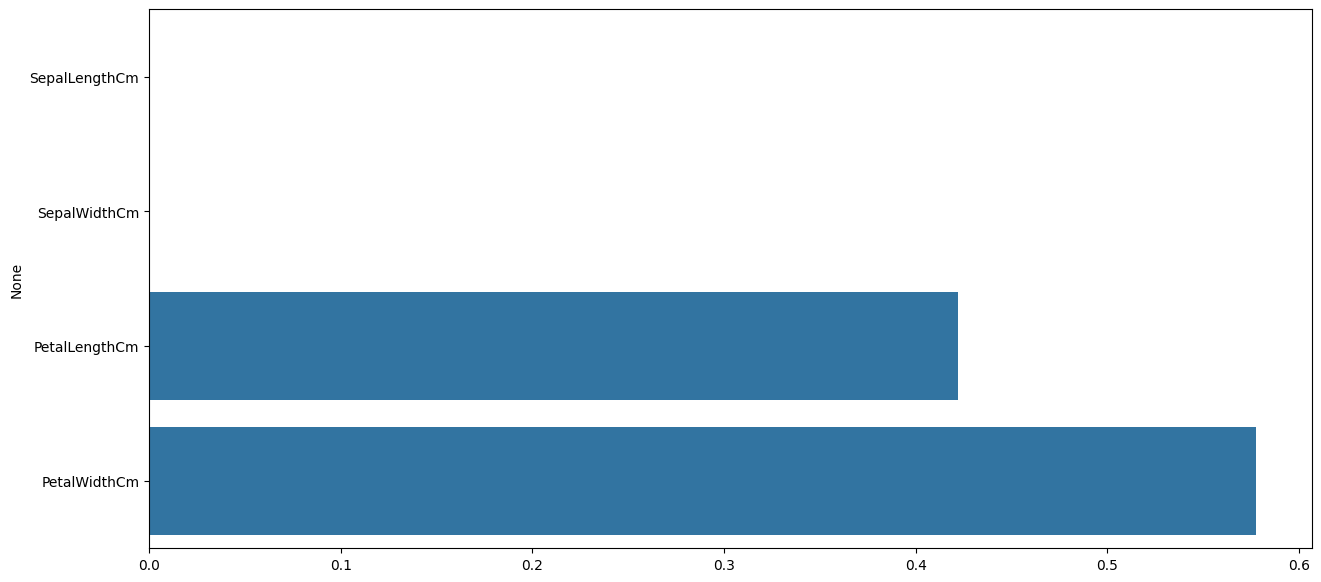

In [7]:
plt.figure(figsize=(15,7))
sns.barplot(x=classifier.feature_importances_, y=X_train.columns)
plt.show()

### Task: Implement the same on Wine Dataset

## Pruning In Decision Trees

There are two types of pruning techniques in Decision Trees:
> Pre-Pruning<br>
> Post Pruning

- **Pre-Pruning**:
    > - It is nothing but stoping the growth of decision tree on an early stage.
    > - For that we can limit the growth of trees by setting constrains.
    > - We can limit parameters like max_depth , min_samples etc.
    > - An effective way to do is that we can grid search those parameters and choose the optimum values that gives better performace on test data.
    > - As of now we will control these parameters
```
max_depth: maximum depth of decision tree
min_sample_split: The minimum number of samples required to split an internal node:
min_samples_leaf: The minimum number of samples required to be at a leaf node.
```

- **Post Pruning**:
    > - Decision trees can easily overfit. One way to avoid it is to limit the growth of trees by setting constrains.
    > - We can limit parameters like max_depth , min_samples etc.
    > - But effective way is to use post pruning methods like **Cost Complexity Pruning**.
    > - This helps to improve test accuracy and get a better model.

<b><u><h4> Cost complexity pruning is all about finding the right parameter for alpha.We will get the alpha values for this tree and will check the accuracy with the pruned trees. </h4></u></b>
<br>
For more information, you can refer to the following video: <a href="https://www.youtube.com/watch?v=D0efHEJsfHo&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=42">Pruning by Josh Starmer</a>

## Why Pruning decision trees is Important?
> Decision Tree Pruning has an important role in optimizing the decision tree model.<br>
> It involves the removal of certain parts of the tree which can potentially reduce its performance.

Here is why decision tree pruning is important:

1. <b><u>Prevents Overfitting</b></u>:
   
    > - Decision trees are prone to overfitting, where the model memorizes the training data rather than learning generalizable patterns.
    > - Pruning helps prevent overfitting by simplifying the tree structure, removing branches that capture noise or outliers in the training data.

2. <b><u>Improves Generalization</u></b>:
    > - By reducing the complexity of the decision tree, pruning enhances the model’s ability to generalize to unseen data.
    > - A pruned decision tree is more likely to capture underlying patterns in the data rather than memorizing specific instances, leading to better performance on new data.

3. <b><u>Reduces Model Complexity</b></u>:
   > - Pruning results in a simpler decision tree with fewer branches and nodes.
   > - This simplicity not only makes the model easier to interpret but also reduces computational requirements during both training and inference.
   > - A simpler model is also less prone to overfitting and more robust to changes in the data.
4. <b><u>Enhances Interpretability</b></u>:
    > - Pruning produces decision trees with fewer branches and nodes, which are easier to interpret and understand.
    > - This is particularly important in applications where human insight into the decision-making process is valuable, such as in medical diagnosis or financial decision-making.
5. <b><u>Speeds Up Training and Inference</b></u>:
    > - Pruned decision trees require less computational resources during both training and inference phases.
    > - With fewer branches and nodes, the decision-making process becomes more efficient, resulting in faster predictions without sacrificing accuracy.
6. <b><u>Facilitates Model Maintenance</b></u>:
    > - Pruning helps maintain decision tree models over time by keeping them lean and relevant.
    > - As new data becomes available or the problem domain evolves, pruned decision trees are easier to update and adapt compared to overly complex, unpruned trees.

In [8]:
# For pruning we will use the breast cancer dataset available in sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [9]:
# Load breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# Separating Training and Testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

# Train decision tree model
model = DecisionTreeClassifier(criterion="gini")
model.fit(X_train, y_train)

DecisionTreeClassifier()

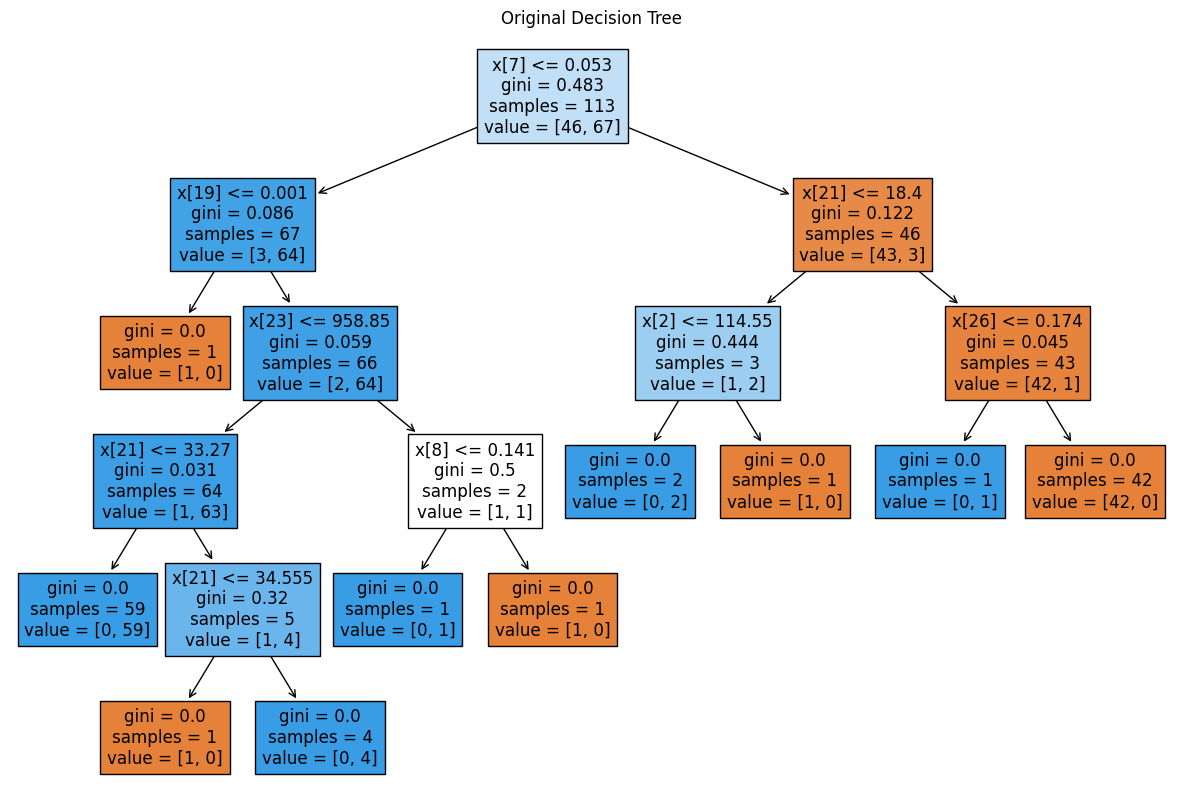

Accuracy before pruning: 0.9122807017543859


In [10]:
# Plot original tree
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True)
plt.title("Original Decision Tree")
plt.show()

# Model Accuracy before pruning
accuracy_before_pruning = model.score(X_test, y_test)
print("Accuracy before pruning:", accuracy_before_pruning)

#### Applying Cost Complexity Pruning

In [11]:
# Cost-complexity pruning (Post-pruning)
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

- `model.cost_complexity_pruning_path(X_train, y_train)`:
    > - This method calculates the effective alphas (ccp_alphas) and the corresponding impurities for each alpha value.
    > - Alpha (ccp_alpha) is a parameter that controls the complexity of the decision tree.
    > - Higher values of alpha will result in more pruning.
- `path`: This variable contains the alphas and impurities computed.
- `ccp_alphas`: These are the alpha values that will be used for pruning.
- `impurities`: These are the impurities corresponding to each alpha value.

In [12]:
print(path, ccp_alphas, impurities, sep="\n")

{'ccp_alphas': array([0.        , 0.00858139, 0.01179941, 0.0163943 , 0.01728751,
       0.02054756, 0.38237729]), 'impurities': array([0.        , 0.03432556, 0.04612497, 0.06251926, 0.07980677,
       0.10035433, 0.48273162])}
[0.         0.00858139 0.01179941 0.0163943  0.01728751 0.02054756
 0.38237729]
[0.         0.03432556 0.04612497 0.06251926 0.07980677 0.10035433
 0.48273162]


In [13]:
# Train a series of decision trees with different alpha values
pruned_models = []
for ccp_alpha in ccp_alphas:
    # Create a decision tree classifier with the specified alpha value.
    pruned_model = DecisionTreeClassifier(criterion="gini", ccp_alpha=ccp_alpha)
    pruned_model.fit(X_train, y_train)
    pruned_models.append(pruned_model)

In [14]:
# Find the model with the best accuracy on test data
best_accuracy = 0
best_pruned_model = None
for pruned_model in pruned_models:
    accuracy = pruned_model.score(X_test, y_test)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_pruned_model = pruned_model

In [15]:
# Model Accuracy after pruning
accuracy_after_pruning = best_pruned_model.score(X_test, y_test)
print("Accuracy after pruning:", accuracy_after_pruning)

Accuracy after pruning: 0.918859649122807


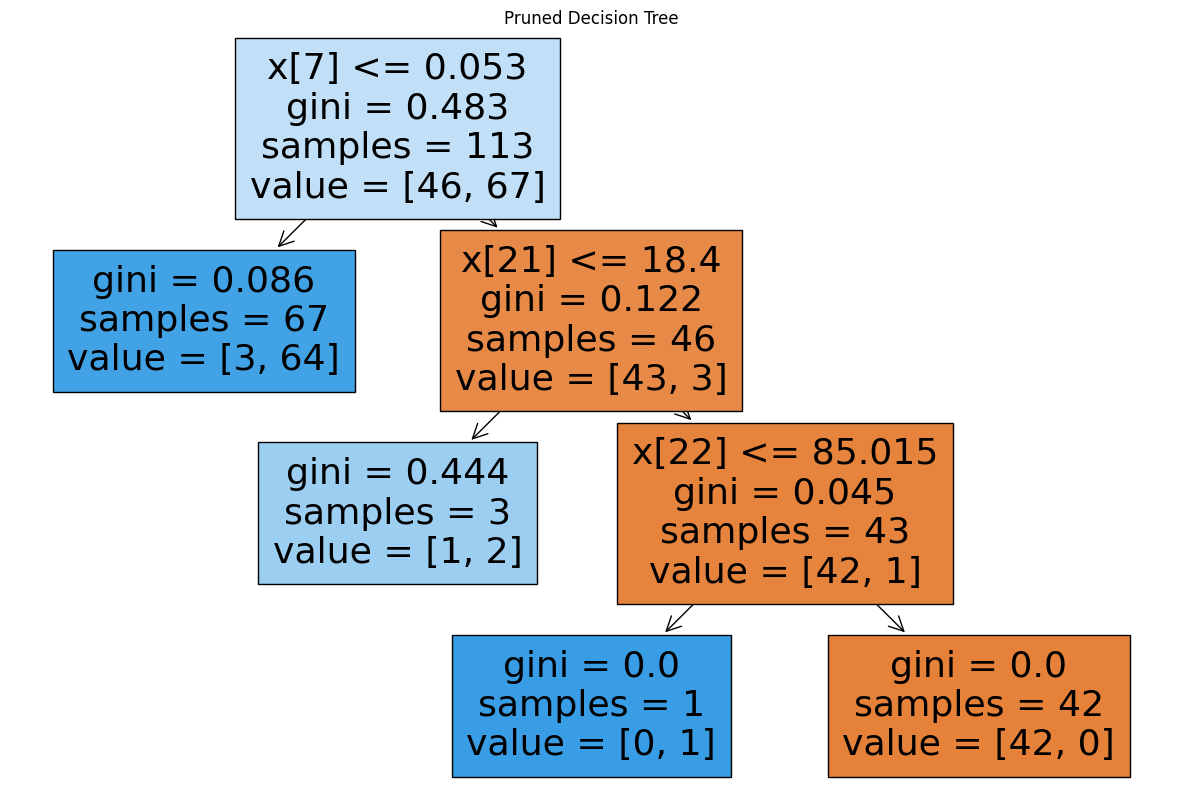

In [16]:
# Plot pruned tree
plt.figure(figsize=(15, 10))
plot_tree(best_pruned_model, filled=True)
plt.title("Pruned Decision Tree")
plt.show()

# Simple Linear Regression

- Documentation Link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Below mentioned are the steps to be followed:
1. Load the data
2. Understand and Viz the data
3. Data Preparation - train-test Split, Normalisation or Rescaling
4. Training the Model
5. Residual Analysis on Training Data
6. Prediction
7. Evaluation

## 1. Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"data\student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## 2. Understanding and Visualizing the data

In [3]:
df.shape

(25, 2)

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


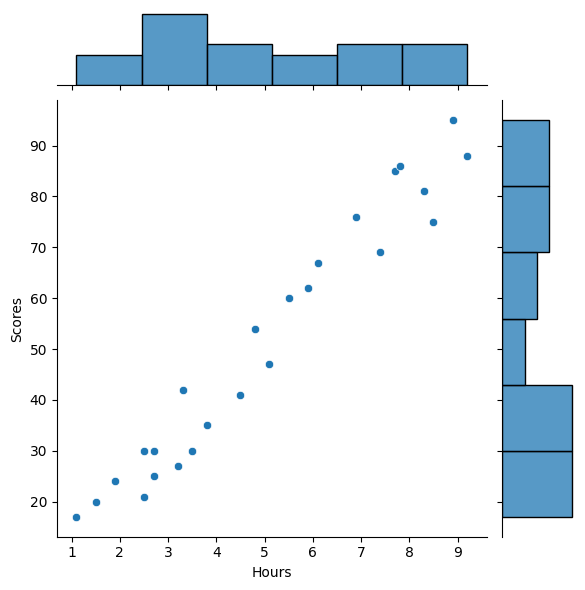

In [5]:
sns.jointplot(x='Hours', y='Scores', data=df, kind = 'scatter')

<Axes: >

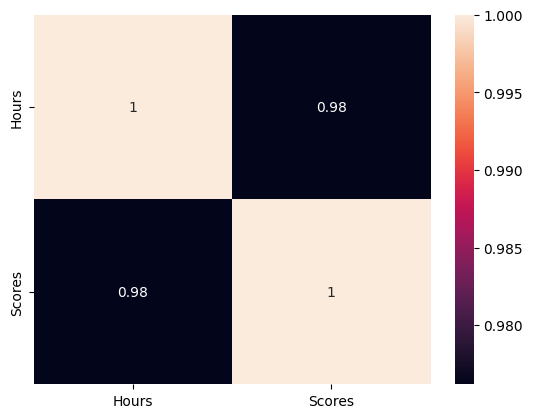

In [6]:
plt.figure()
sns.heatmap(df.corr(), annot = True)

## 3. Data Preparation

1. Splitting df into train and test
2. Rescaling the variables (Normalisation or Standardisation)
    - Interpretability improves
    - Model trains fast

In [7]:
X = df[['Hours']]
y = df['Scores']

In [8]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

print(X_train.shape)
print(X_test.shape)

(17, 1)
(8, 1)


In [9]:
X_train.head()

,Hours
23,6.9
14,1.1
1,5.1
10,7.7
13,3.3


In [10]:
X_test.head()

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


## 4. Model Training

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
print('y intercept: ',regressor.intercept_)

y intercept:  2.370815382341881


In [13]:
print('slope: ',regressor.coef_)

slope:  [9.78856669]


## 5. Residual Analysis on Training Data

1. Distribution of the Residuals - Distribution should be normal (Gaussian) with Zero Mean.
2. IID - Check for patterns in Residuals - There should exist no pattern
3. Homoscedasticity - The variance of residual is the same for any value of X

In [14]:
y_train_pred = regressor.predict(X_train)

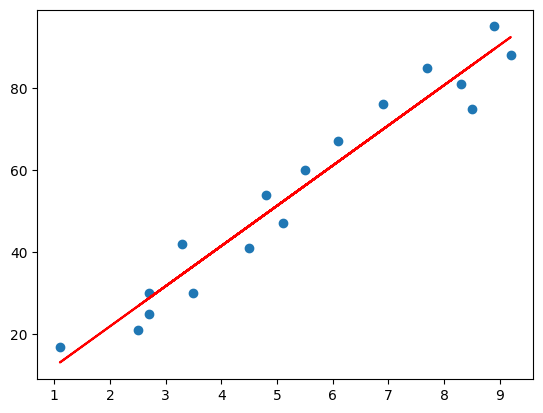

In [15]:
plt.scatter(X_train['Hours'], y_train)
plt.plot(X_train['Hours'], y_train_pred, 'r')
plt.show()

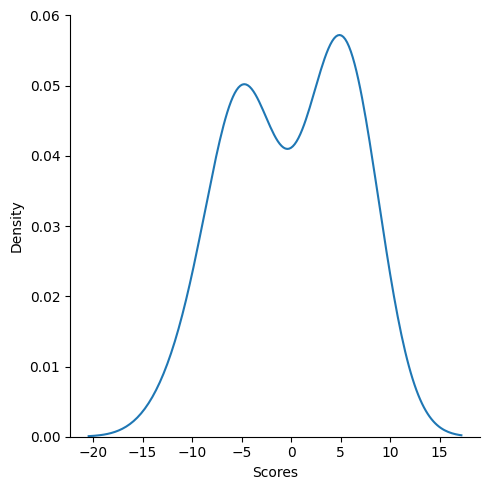

In [16]:
residual = y_train - y_train_pred
sns.displot(residual, kind='kde')

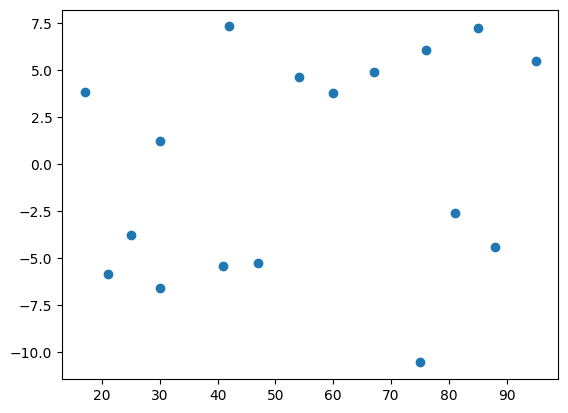

In [17]:
plt.scatter(y_train, residual)
plt.show()

## 6. Prediction

In [18]:
y_test_pred = regressor.predict(X_test)

In [19]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


## 7. Evaluation

In [20]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  4.419727808027652
Mean Squared Error:  22.96509721270043
Root Mean Squared Error:  4.792191274636315


In [21]:
metrics.median_absolute_error(y_test, y_test_pred)

3.8625683463868796

In [22]:
print(metrics.r2_score(y_test, y_test_pred))

0.9568211104435257


In [23]:
# Adjusted R2 Score
r2 = metrics.r2_score(y_test, y_test_pred)
n = len(y_test)
k = X_test.shape[1]
r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)
print(r2_adj)

0.9496246288507799


# Multiple Linear Regression

Build a MLR Model using `sklearn`:

- Load the data
- Understanding the data (EDA)
- Data Preparation (Train Test Split)
- Use `sklearn` in order to train the model
- Resdual Analysis on Train Data
- Prediction on Test Data
- Evaluation - (RMSE, R_squared)

In [1]:
# Loading the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"data\HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
# dropping null values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,394.0,3.690136,9.202423,0.00632,0.081955,0.26888,3.435973,88.9762
ZN,394.0,11.460660,23.954082,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,394.0,11.000863,6.908364,0.46000,5.130000,8.56000,18.100000,27.7400
CHAS,394.0,0.068528,0.252971,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,394.0,0.553215,0.113112,0.38900,0.453000,0.53800,0.624000,0.8710
RM,394.0,6.280015,0.697985,3.56100,5.879250,6.20150,6.605500,8.7800
AGE,394.0,68.932741,27.888705,2.90000,45.475000,77.70000,94.250000,100.0000
DIS,394.0,3.805268,2.098571,1.12960,2.110100,3.19920,5.116700,12.1265
RAD,394.0,9.403553,8.633451,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,394.0,406.431472,168.312419,187.00000,280.250000,330.00000,666.000000,711.0000


<Axes: >

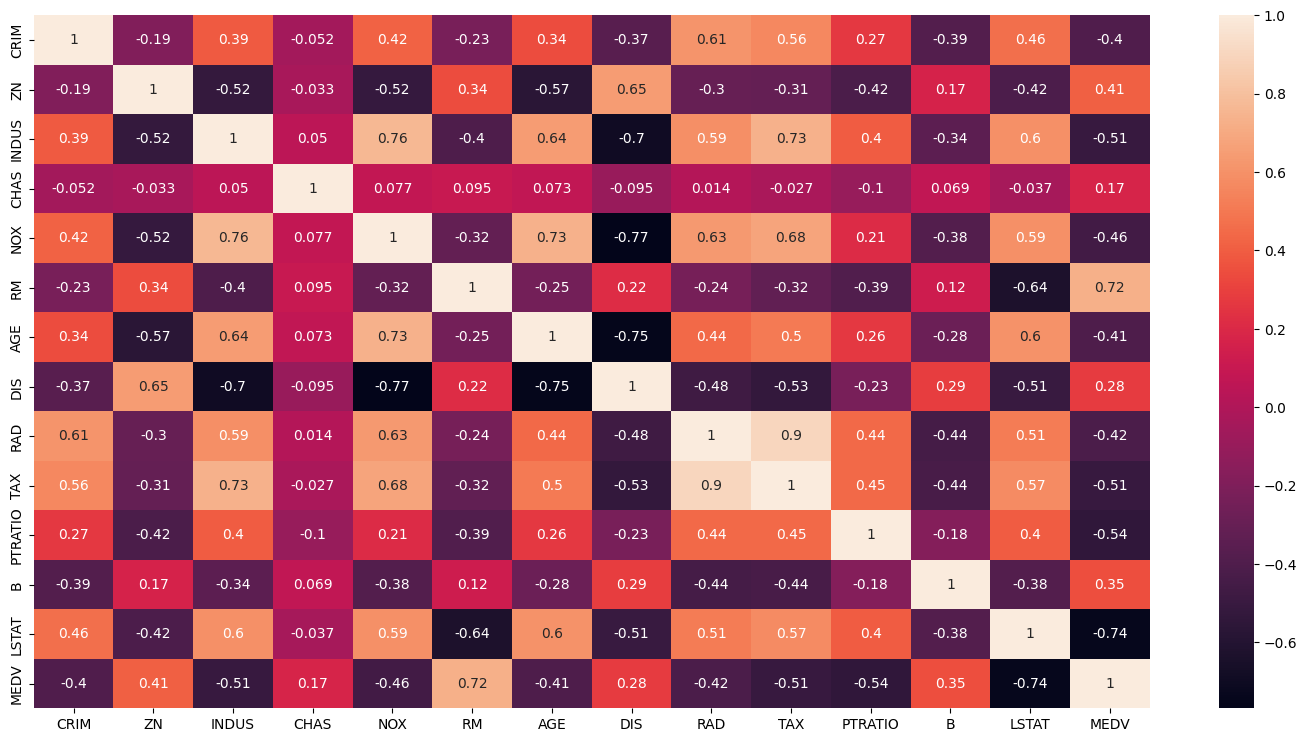

In [6]:
plt.figure(figsize=(18, 9))
sns.heatmap(df.corr(), annot = True)

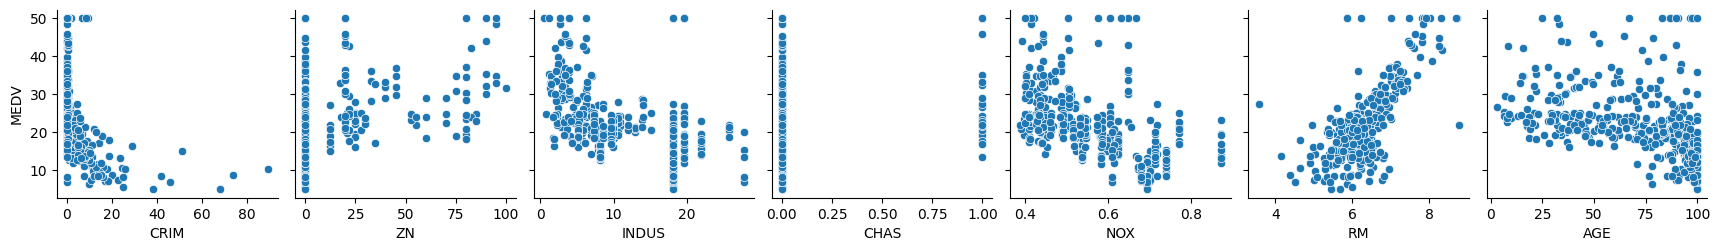

In [7]:
sns.pairplot(data = df,
            x_vars = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE'],
            y_vars = 'MEDV')

In [8]:
# Segregating Input and Output
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = df['MEDV']

In [9]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(315, 13)
(315,)
(79, 13)
(79,)


In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
# Residual Analysis on Training data
y_train_pred = regressor.predict(X_train)

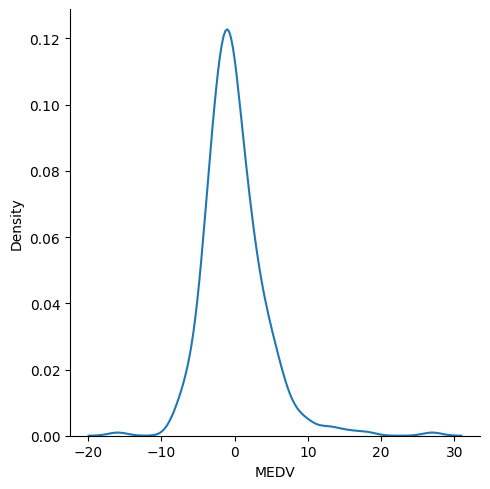

In [12]:
residual = y_train - y_train_pred
sns.displot(residual, kind='kde')

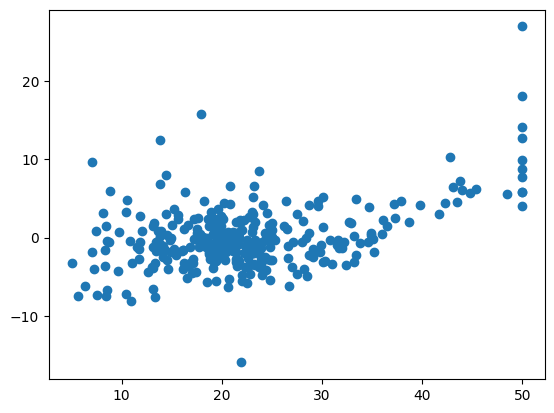

In [13]:
plt.scatter(y_train, residual)
plt.show()

<Axes: xlabel='MEDV', ylabel='Count'>

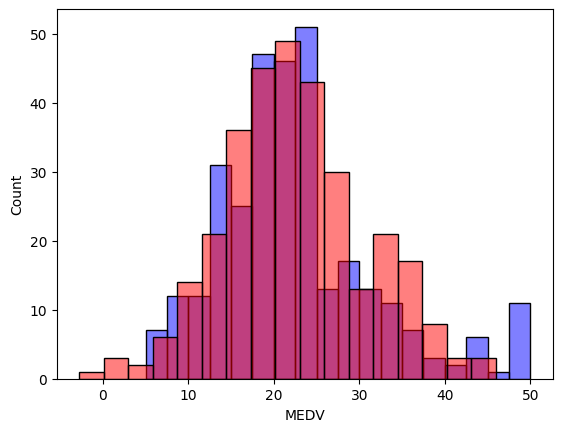

In [14]:
sns.histplot(y_train, color='blue', alpha=0.5)
sns.histplot(y_train_pred, color='red', alpha=0.5)

In [15]:
# Making a Prediction on unseen data
y_test_pred = regressor.predict(X_test)
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df

,Actual,Predicted
136,17.4,16.191600
360,25.0,19.914843
81,23.9,26.517535
195,50.0,41.548241
421,14.2,16.378620
...,...,...
106,19.5,17.378550
153,19.4,15.868459
76,20.0,23.036573
65,23.5,29.637718


<Axes: xlabel='MEDV', ylabel='Count'>

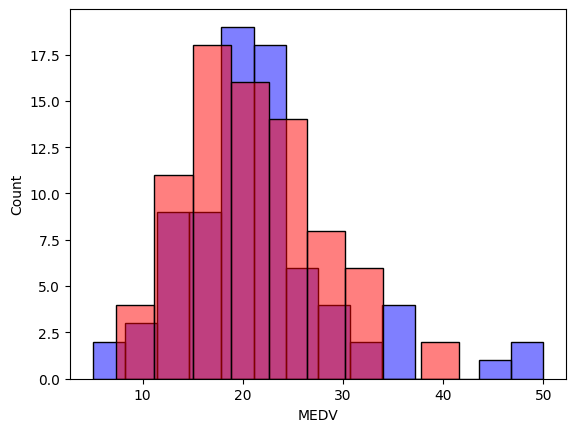

In [16]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [17]:
# Evaluation
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  3.4843562556302543
Mean Squared Error:  28.849872777167093
Root Mean Squared Error:  5.37120775777358


In [18]:
# R2 Score
print(metrics.r2_score(y_test, y_test_pred))

0.58065631230158


In [19]:
n = len(y_test)
r2= metrics.r2_score(y_test, y_test_pred)
k = X_test.shape[1]
r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)
print(r2_adj)

0.49678757476189594


# Lasso Regularization (Least Absolute Shrinkage and Selection Operator)

- aka L1 Regularization
- Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
<br>

**How Lasso Works**:
- Lasso builds upon linear regression by adding a penalty term to the standard regression equation.
- Linear regression minimizes the sum of squared discrepancies between observed and predicted values by fitting a line (or hyperplane) to the data points.
- However, in real-world datasets, multicollinearity (strong correlation between features) can occur.
- Lasso’s regularization process helps address this issue by adding a penalty term, preventing overfitting.
- For example, when predicting house prices based on features like location, square footage, and bedrooms, Lasso can identify which features are more important.

**Advantages and Disadvantages**:
- Advantages:
    - Selects relevant features, improving model interpretability.
    - Helps prevent overfitting.
- Disadvantages:
    - May lead to overly simplistic models.
    - Requires tuning of the regularization strength parameter.
<br>

In summary, lasso regression strikes a balance between feature selection and regularization, making it a valuable tool for predictive modeling and interpretability
<br>

**Bias-Variance Tradeoff in L1 Regularization**:
- The balance between bias (error due to oversimplified assumptions) and variance (sensitivity to data variations) is crucial.
- Lasso’s penalty term (L1 regularization) significantly reduces variance by shrinking coefficients of less significant features toward zero.
- This helps avoid overfitting, but it may lead to overly simplistic models with increased bias.
- The tradeoff between bias and variance is a key consideration in lasso regression.

**When to use Lasso Regression**

- When working with high-dimensional datasets that contain a large number of features some of which may be redundant or irrelevant, lasso regression is very helpful.
- **Feature Selection**:
    - By reducing the coefficients of less significant features to zero, Lasso regression automatically chooses a selection of features.
    - When you have a lot of features and want to find the ones that are most significant, this is helpful.
- **Collinearity**:
    - By reducing the coefficients of correlated variables and choosing one, lasso regression might be useful when there is multicollinearity—that is, when the predictor variables have a high degree of correlation with one another.
- **Regularization**:
    - By penalizing big coefficients, Lasso regression can aid in preventing overfitting.
    - When the number of predictors approaches or surpasses the number of observations, this becomes particularly significant.
- **Interpretability**:
    - Compared to conventional linear regression models that incorporate all features, lasso regression often yields sparse models with fewer non-zero coefficients.
    - This could make the final model simpler to understand.
- It is important to remember that **lasso regression could not work effectively if the true underlying model is dense** (many predictors having non-zero coefficients) and there are high correlations among the variables.

# Understanding the Bias Variance Tradeoff

**What is Bias?**
- The bias is known as the difference between the prediction of the values by the Machine Learning model and the correct value.
-  It is recommended that an algorithm should always be low-biased to avoid the problem of underfitting.
-  By high bias, the data predicted is in a straight line format, thus not fitting accurately in the data in the data set.
-  Such fitting is known as the <u>**Underfitting of Data**</u>.
-  Below is an example of High bias model.
<br>

<img src = "imgs\high bias.png">

<br>


**What is Variance?**

- The variability of model prediction for a given data point which tells us the spread of our data is called the variance of the model.
- The model with high variance has a very complex fit to the training data and thus is not able to fit accurately on the data which it hasn’t seen before.
- As a result, such models perform very well on training data but have high error rates on test data.
- When a model is **high** on **variance**, it is then said to as **Overfitting of Data**.
- Below is an example of a model with high variance.
<br>

<img src="imgs\high variance.png">

**Bias-Variance Tradeoff**

- If the `model` is too `simple` then it will be on **high bias and low variance** condition and thus is `error-prone`.
- If the `model` is too `complex` then it will be on **high variance and low bias**. As a direct consequence of this the `new entries will not perform well`.
- There is something between both of these conditions, known as `Bias Variance Trade-off`.
- This tradeoff in complexity is why there is a tradeoff between bias and variance.
- An algorithm can’t be more complex and less complex at the same time.

<img src = "imgs\bias variance tradeoff.png">
<br>

- Example of best fit:<br>
<img src = "imgs\best fit.png">

- The total error for a model is as follows:
$$Total\ Error\ =\ Bias^2\ +\ Variance\ +\ Irreducible\ Error$$

<br>

- In the above formula of `Total Error`, the only terms which we can minimize is `Bias` and `Variance`.
- `Irreducible Error`(IRE) will always exist for any AI Model which is made. If IRE is 0 it is analogus to saying that you have created a God like entity.

<img src="imgs\model complexity.png">

# Lasso Regression Code

In [20]:
from sklearn.linear_model import Lasso

In [21]:
regressor_lasso = Lasso(alpha=10.0)
regressor_lasso.fit(X_train, y_train)

Lasso(alpha=10.0)

In [22]:
print(regressor_lasso.intercept_)

30.9185595443383


In [23]:
print(regressor_lasso.coef_)

[-0.          0.03676839 -0.          0.          0.          0.
  0.00362219 -0.          0.         -0.01272705 -0.          0.00697338
 -0.50977972]


In [24]:
print(X_train.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [25]:
# Selecting Important Features
importance = regressor_lasso.coef_
features = X_train.columns
print(np.array(features)[importance != 0])

['ZN' 'AGE' 'TAX' 'B' 'LSTAT']


In [26]:
print(np.array(features)[importance == 0])

['CRIM' 'INDUS' 'CHAS' 'NOX' 'RM' 'DIS' 'RAD' 'PTRATIO']


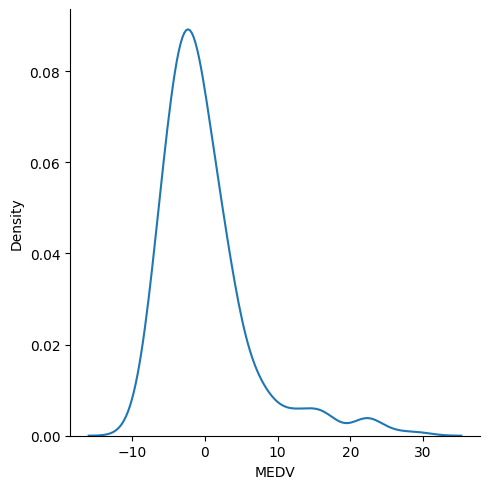

In [27]:
# Residual Analysis on Training Data
y_train_pred_lasso = regressor_lasso.predict(X_train)
residual_lasso = y_train - y_train_pred_lasso
sns.displot(residual_lasso, kind='kde')

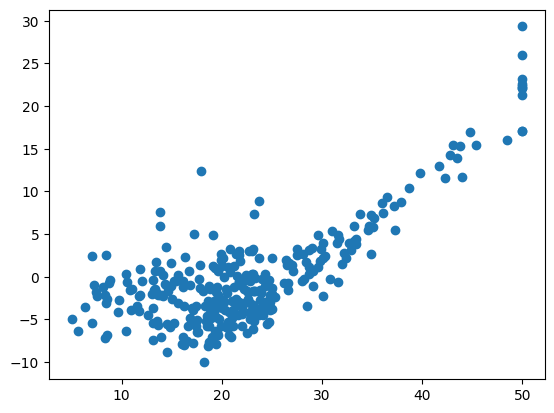

In [28]:
plt.scatter(y_train, residual_lasso)
plt.show()

In [29]:
# Prediction
y_test_pred_lasso = regressor_lasso.predict(X_test)
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_lasso})
temp_df.head()

,Actual,Predicted
136,17.4,19.717918
360,25.0,21.401863
81,23.9,27.594740
195,50.0,31.965614
421,14.2,17.015340


In [30]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_lasso))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred_lasso))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lasso)))

Mean Absolute Error:  4.166135928496611
Mean Squared Error:  34.428241967633674
Root Mean Squared Error:  5.867558433252597


<Axes: xlabel='MEDV'>

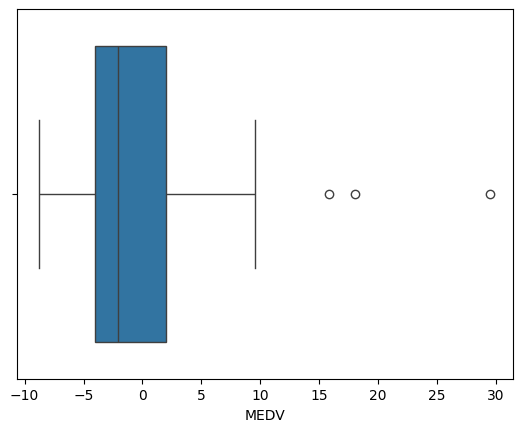

In [31]:
residual_test_lasso = y_test - y_test_pred_lasso
sns.boxplot(x = residual_test_lasso)

# Ridge Regularization 

**Ridge regression**, also known as **L2 regularization**, is a statistical technique used to improve linear regression models by addressing issues related to overfitting and multicollinearity. Let's dive into the details:

1. **Overfitting and Regularization**:
   - In machine learning, overfitting occurs when a model learns the training data too well and captures noise or random fluctuations. As a result, it performs poorly on unseen data.
   - Regularization methods aim to prevent overfitting by adding a penalty term to the cost function. Ridge regression is one such regularization technique.

2. **The Problem: Multicollinearity**:
   - In standard linear regression, we have a multiple-variable equation:
     $$ Y = B_0 + B_1X_1 + B_2X_2 + \ldots + B_pX_p $$
   - Here, **Y** is the predicted value (dependent variable), **X_i** are predictors (independent variables), and **B_i** are regression coefficients.
   - **Multicollinearity** occurs when two or more predictors have a near-linear relationship.
       - For example, if delivery distance and item quantity are highly correlated in a supply chain dataset.
   - Multicollinearity leads to unstable coefficient estimates and affects model interpretability.

3. **How Ridge Regression Works**:
   - Ridge regression modifies the ordinary least squares (OLS) matrix coefficient estimator by adding a regularization term:
     $$ \text{Cost function} = \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2 + \lambda \sum_{j=1}^{p} B_j^2 $$
   - The regularization term $$(\lambda \sum_{j=1}^{p} B_j^2)$$ penalizes large coefficients.
   - The parameter **λ** controls the strength of regularization. As **λ** increases, the coefficients shrink.
   - Ridge regression aims to find a balance between fitting the data and preventing large coefficients.
   - It specifically corrects for multicollinearity by reducing the impact of correlated predictors.

4. **Benefits of Ridge Regression**:
   - Reduces overfitting: By adding the penalty term, ridge regression prevents the model from fitting noise in the training data.
   - Stabilizes coefficient estimates: Ridge coefficients are less sensitive to small changes in the data.
   - Improves long-term predictions: Although ridge introduces a slight bias, it often leads to better generalization.

In [32]:
from sklearn.linear_model import Ridge

In [34]:
regressor_ridge = Ridge(alpha=10.0)
regressor_ridge.fit(X_train, y_train)

Ridge(alpha=10.0)

In [35]:
print(regressor_ridge.intercept_)

19.09473604086135


In [49]:
print(regressor_ridge.coef_)

[-0.06545089  0.04938326 -0.01746324  1.78581861 -1.62263182  4.72440513
 -0.03412016 -1.27320969  0.20827159 -0.01537458 -0.72502371  0.01115213
 -0.38867387]


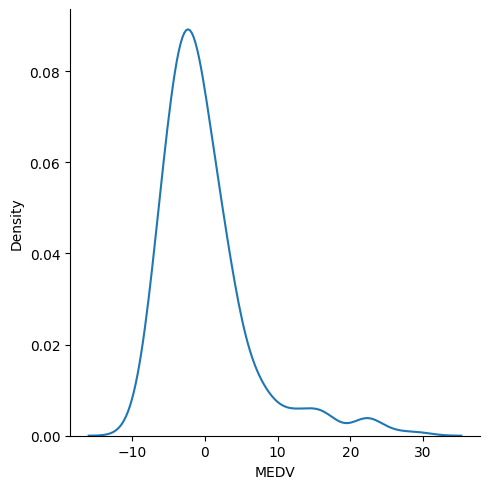

In [37]:
# Residual Analysis on Training Data
y_train_pred_ridge = regressor_ridge.predict(X_train)
residual_ridge = y_train - y_train_pred_ridge
sns.displot(residual_lasso, kind='kde')

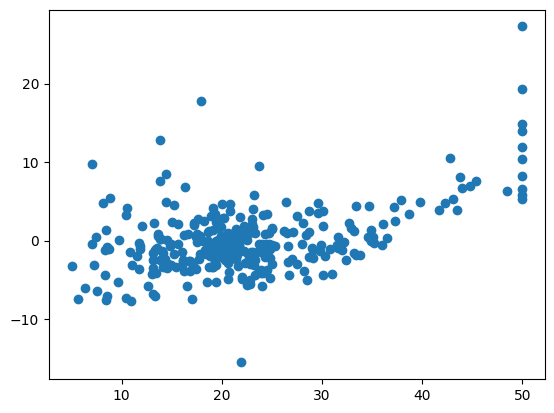

In [38]:
plt.scatter(y_train, residual_ridge)
plt.show()

In [43]:
# Prediction
y_test_pred_ridge = regressor_ridge.predict(X_test)
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_ridge})
temp_df.head()

,Actual,Predicted
136,17.4,16.450327
360,25.0,22.512866
81,23.9,25.886109
195,50.0,40.987326
421,14.2,17.470181


In [44]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_ridge))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred_ridge))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_ridge)))

Mean Absolute Error:  3.403400987479531
Mean Squared Error:  27.298134577076393
Root Mean Squared Error:  5.224761676581659


<Axes: xlabel='MEDV'>

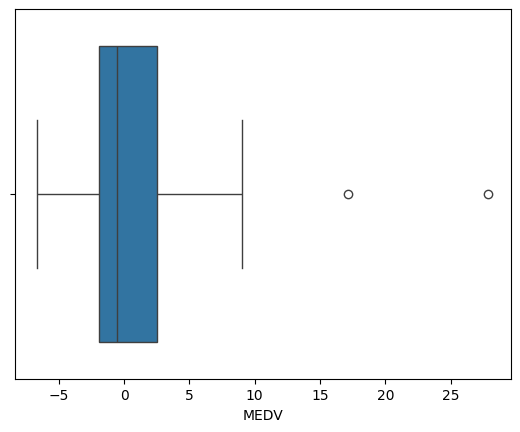

In [45]:
residual_test_ridge = y_test - y_test_pred_ridge
sns.boxplot(x = residual_test_ridge)

# Elastic Net Regularization

**Elastic Net regularization** is a regularization technique that linearly combines the **L1** and **L2** penalties of the Lasso and Ridge methods. It is used in many machine learning models to prevent overfitting and improve model performance.

Here's how it works:

1. **Linear Regression**:
   - Similar to Ridge regularization, Elastic Net is used in linear regression models where we try to find a linear relationship between input features (independent variables) and the target variable (dependent variable).
   - The goal is to find the best-fitting line (or hyperplane in higher dimensions) that minimizes the difference between predicted values and actual target values.

2. **Overfitting**:
   - Overfitting occurs when the model fits the training data too closely, capturing noise and random fluctuations.
   - An overfit model performs well on the training data but poorly on unseen data (test/validation data).

3. **Elastic Net Regularization**:
   - Elastic Net introduces a **penalty term** to the linear regression cost function that is a combination of both L1 and L2 penalties.
   - The cost function for Elastic Net regression is:
     $$ J(\theta) = \text{MSE}(\theta) + \alpha \rho \sum_{i=1}^{n} |\theta_i| + \frac{\alpha (1-\rho)}{2} \sum_{i=1}^{n} \theta_i^2 $$
     where:<br>
     $$(J(\theta)) \text{is the cost function.}$$
     $$(\text{MSE}(\theta)) \text{is the mean squared error (similar to the standard linear regression cost).}$$
     $$(\alpha) \text{is the regularization parameter (hyperparameter).}$$
     $$(\rho) \text{is the mixing parameter that controls the balance between L1 and L2 regularization.}$$
     $$(\theta_i) \text{represents the coefficients (weights) of the model.}$$

4. **Effect of Elastic Net Regularization**:
   - Elastic Net regularization adds a bias to the model by penalizing large coefficients, similar to Ridge and Lasso regularization.
   - As **alpha** increases, the coefficients tend to become smaller, reducing the model's complexity and making it less prone to overfitting.
   - Elastic Net aims to strike a balance between fitting the training data and preventing overfitting, while also balancing the penalties of L1 and L2 regularization.

5. **Tuning the Regularization Strength**:
   - The choice of **alpha** and **rho** is crucial.
   - Cross-validation techniques (e.g., k-fold cross-validation) help determine the optimal values of **alpha** and **rho**.
   - A small **alpha** (close to 0) makes Elastic Net regression similar to standard linear regression.
   - A large **alpha** increases the regularization effect.
   - **rho** controls the balance between L1 and L2 regularization. When **rho = 1**, Elastic Net is equivalent to Lasso regression, and when **rho = 0, it is equivalent to Ridge regression.

6. **Advantages of Elastic Net Regularization**:
   - Helps stabilize model estimates when features are highly correlated, similar to Ridge regularization.
   - Can perform feature selection, similar to Lasso regularization.
   - Works well even with a small number of observations.
   - Can handle multicollinearity between features better than Lasso and Ridge regularization alone.

- In summary, Elastic Net regularization is a powerful tool in regression tasks that combines the strengths of both Lasso and Ridge regularization.
- It balances model complexity, prevents overfitting, and can perform feature selection, making it a valuable tool in many machine learning tasks. 

In [46]:
from sklearn.linear_model import ElasticNet

In [47]:
regressor_ElasticNet = ElasticNet(alpha=10.0)
regressor_ElasticNet.fit(X_train, y_train)

ElasticNet(alpha=10.0)

In [50]:
print(regressor_ElasticNet.intercept_)

29.978539118088424


In [51]:
print(regressor_ElasticNet.coef_)

[-0.          0.05151489 -0.          0.          0.          0.
  0.02695174 -0.          0.         -0.01228858 -0.          0.00679529
 -0.58437254]


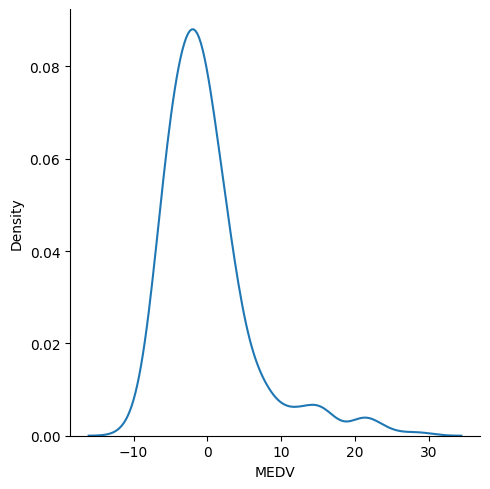

In [52]:
# Residual Analysis on Training Data
y_train_pred_ElasticNet = regressor_ElasticNet.predict(X_train)
residual_ElasticNet = y_train - y_train_pred_ElasticNet
sns.displot(residual_ElasticNet, kind='kde')

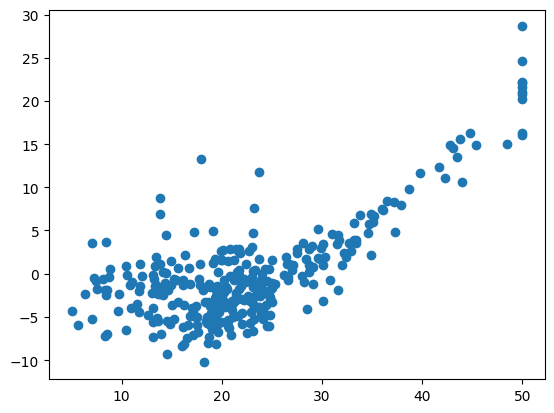

In [53]:
plt.scatter(y_train, residual_ElasticNet)
plt.show()

In [54]:
# Prediction
y_test_pred_ElasticNet = regressor_ElasticNet.predict(X_test)
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_ElasticNet})
temp_df.head()

,Actual,Predicted
136,17.4,19.822840
360,25.0,22.159079
81,23.9,28.179974
195,50.0,32.771920
421,14.2,17.362553


In [55]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_ElasticNet))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred_ElasticNet))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_ElasticNet)))

Mean Absolute Error:  4.130168674489756
Mean Squared Error:  33.256676362272344
Root Mean Squared Error:  5.766860182306516


<Axes: xlabel='MEDV'>

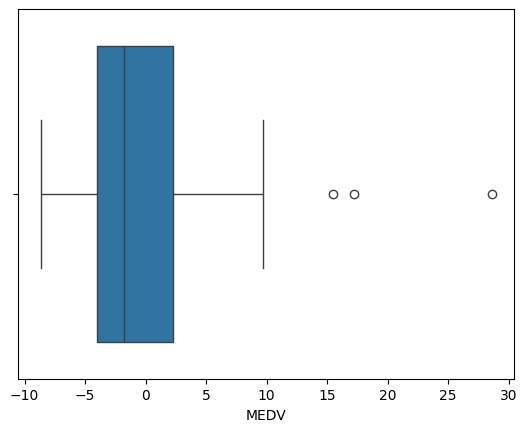

In [56]:
residual_test_ElasticNet = y_test - y_test_pred_ElasticNet
sns.boxplot(x = residual_test_ElasticNet)

# When to use L1 L2 and Elastic Net Regularization Techniques

1. **L1 Regularization (Lasso)**:
   - **Feature Selection**:
       - L1 regularization is useful when you want to perform automatic feature selection.
       - It tends to make coefficients for some variables exactly zero, effectively excluding them from the model.
   - **Interpretability**:
       - If you have a high-dimensional dataset with many features, L1 can help create a simpler, more interpretable model by eliminating irrelevant features.
   - **Sparse Solutions**:
       - L1 regularization is suitable for models where only a few features are important.
       - It helps in creating sparse solutions where only a subset of the features are non-zero.

2. **L2 Regularization (Ridge)**:
   - **Multicollinearity**:
       - L2 regularization is useful when you have multicollinearity in your data, i.e., when the independent variables are highly correlated.
       - It helps to stabilize the estimates and improve the model's generalization.
   - **Overfitting**:
       - L2 regularization is a good choice when you want to prevent overfitting.
       - It does this by constraining the model's complexity (the magnitude of the coefficients).
   - **Non-Sparse Solutions**:
       - Unlike L1, L2 regularization does not result in sparse solutions and is generally better when all features are important.

3. **Elastic Net Regularization**:
   - **Balance of L1 and L2**:
       - Elastic Net is useful when you want to balance the properties of L1 and L2 regularization.
       - It includes both the L1 and L2 penalty terms, so it works well when you have a mix of features where some should be excluded (like in L1) and others should be included (like in L2).
   - **Grouped Variables**:
       - If you have a group of correlated variables, Elastic Net tends to either select all variables in the group or none of them, which can be beneficial in certain cases.
   - **High Dimensionality**:
       - Elastic Net is particularly useful when the number of predictors (p) is much larger than the number of observations (n), i.e., when p >> n.